# On modelling optimization problems via Julia JuMP

## Prof. Mayron César O. Moreira 

**Universidade Federal de Lavras (UFLA)**  
**Department of Computer Science**  
**Lavras, Minas Gerais, Brazil**  

*Università degli Studi di Modena e Reggio Emilia (UNIMORE)*  
*Reggio Emilia, Italy*

## JuMP: Julia for Mathematical Programming

### Exercise 1 (Take as much as you can!)

"*The binary knapsack problem is defined by the task of taking a set of items, each with a weight, and fitting as many of them into the knapsack while coming as close to, but not exceeding, the maximum weight the knapsack can hold.*" (https://www.sciencedirect.com/topics/engineering/knapsack-problem)

Implement a mathematical model in Julia for the Knapsack problem. To test your model, use the instance **P01**, extracted from "https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html". This instance is at "instances/" folder. As follows, we present a function the reads the data.

In [ ]:
# We do not need to inform the type returned by the function explicitly.
function readKPSK(io::IO)
    l = readlines(io) # Now we have all the lines
    
    c = parse(Float64, l[1]) # Capacity of the knapsack
    n = parse(Int, l[2]) # Number of objects
    
    v = zeros(Float64, n) # A vector with n positions that represents the profit of each item
    w = zeros(Float64, n) # A vector with n positions that represents the weight of each item
    
    for i=1:n
        v[i] = parse(Float64, l[i+2])
        w[i] = parse(Float64, l[i+n+2])
    end
    
    return (c, n, v, w)
end

fileInstance="instances/P01.txt" # Name of the file instance
io = open(fileInstance) # Using an io object to access the file
(c, n, v, w) = readKPSK(io) # Parameters for the knapsack problem
close(io) # Close file
print(c, " ", n, " ", v, " ", w) # Print input data

In [ ]:
D = []
push!(D, 1)

E = [0 for i=1:n]

#### Getting a feasible solution for the Knapsack problem

A greedy heuristic, adapted from the Fractionary Knapsack Problem, can be used to obtain an initial solution for the problem. The idea is to consider a priority list of items based on the descending order of the ratio of profit and weight. As follows, we show a pseudocode of this algorithm, which has the complexity of $O(nlog\,n)$ (taking into account the sorting phase).

**GreedyAlgKPSK($n,v[1..n],w[1..n$)**
1. Let $\mathcal{N}$ be a set of items sorted in descending order by $\frac{v[i]}{w[i]}$, $i=1,...,n$.
1. Let $c_{curr} = c$ be the current capacity of the knapsack.
1. Let $v_{curr} = 0$ be the current value of the knapsack.
1. Let $\mathcal{I}$ be the set of items returned as a result.
1. **for** i=1 **to** $n$, **do**
    1. $x = \mathcal{N}[i]$
    1. **if** $w_{x} \le c_{curr}$
        1. $c_{curr} = c_{curr} - w_{x}$.
        1. $v_{curr} = v_{curr} + v_{x}$.
        1. $\mathcal{I} = \mathcal{I} \cup \{x\}$.
1. **return** ($\mathcal{I},v_{curr}$)

In [ ]:
N = [(i, v[i]/w[i]) for i=1:n]

## Sorting the items
N = sort(I, lt = (a,b)->a[2]>b[2])

println("Write our code in this block.")

### Exercise 2 (A game)

We want to fill a board of size $n \times n$ with the following symbols: O and ♥. The condition is that each neighboring cell has EXACTLY 1 neighbor with a different logo. For each cell in the board, we count as a neighbor the upper cell, the lower cell, the right cell and the left cell (if they exist). Propose a programming model in Julia for this problem, maximizing the number of O's present on the board.

In [5]:
println("Your code here")

Your code here


### Exercise 3 (Another game)

Consider a board with $3 \times 4$ squares. Each square contains a number:

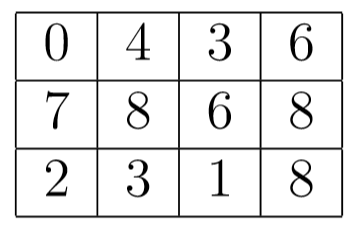

In [6]:
display("image/png", read("images/Exerc3.png"))

The objective of the game is to move a pawn from the upper left corner to the lower right corner, through a sequence of moves to the right or down, to minimize the sum of the points corresponding to the squares where it passed. Implement a JuMP model that solves this problem.

In [7]:
println("Your code here")

Your code here


### Exercise 4 (Pokemon-Go Problem)

* **Exercise extracted from https://github.com/pedrocastellucci/MathematicalProgrammingCourse/blob/master/examples/Example%2001%20-%20The%20travelling%20salesman%20meets%20Pokemon%20Go.ipynb**

[Pokemon Go](https://www.pokemongo.com/it-it/) is a game developed by [Niantic](https://en.wikipedia.org/wiki/Pok%C3%A9mon) which consists in collecting items (or Pokemons) by players through specific placed called Pokestops. Suppose that we have the following Pokestops, represented by their coordinates below.

A player wants to leave the Pokestop one, visit all of them and go back to its starting point, with a minimum walking distance. Implement a code in Julia that models and solves this problem.

**Tip**: use MTZ inequalities! ;)

In [8]:
Pokestops = Dict(
    0 => (523, 418),
    1 => (527, 566),
    2 => (435, 603),
    3 => (386, 660),
    4 => (346, 692),
    5 => (431, 730),
    6 => (419, 818),
    7 => (389, 892),
    8 => (384, 902),
    9 => (383, 913),
    10 => (347, 520),
    11 => (332, 330),
    12 => (165, 374),
    13 => (196, 198),
    14 => (187, 108),
    15 => (210, 63)
)

Dict{Int64,Tuple{Int64,Int64}} with 16 entries:
  2  => (435, 603)
  11 => (332, 330)
  0  => (523, 418)
  7  => (389, 892)
  9  => (383, 913)
  10 => (347, 520)
  8  => (384, 902)
  6  => (419, 818)
  4  => (346, 692)
  3  => (386, 660)
  5  => (431, 730)
  13 => (196, 198)
  14 => (187, 108)
  15 => (210, 63)
  12 => (165, 374)
  1  => (527, 566)

In [9]:
println("Your code here")

Your code here


The *Pokemon-Go Problem* can also be modeled using DFJ (Dantzig-Fulkerson-Johnson) sub-cycle constraints, which has exponential number of inequalities. Thus, we can solve this problem by iteratively adding inequalities to eliminate sub-cycles. Another way to deal with this situation is to apply *lazy constraints* to the model. As far as we know, JuMP 0.19 does not have *lazy constraints* still implemented, according to [Lubin (2018)](https://www.juliaopt.org/meetings/bordeaux2018/lubin.pdf). We look forward to making this feature available!

To see how *lazy constraints* works by means of *callbacks*, we suggest this link from JuMP 0.18: http://www.juliaopt.org/JuMP.jl/v0.12/callbacks.html.